In [1]:
# 📊 Mall Customers Dataset - Explanation

# This dataset contains details about customers visiting a mall.
# Each row represents one customer.

# 🔸 Column Descriptions:

# 1. CustomerID               → A unique ID for each customer (can be ignored in clustering)
# 2. Gender                   → Male or Female (categorical, optional for clustering)
# 3. Age                      → Age of the customer
# 4. Annual Income (k$)       → Income per year (in thousands of dollars)
# 5. Spending Score (1-100)   → Score given by the mall based on customer spending and behavior

# 🎯 Goal:
# Use this data to group customers into different segments (clusters)
# based on their shopping behavior using K-Means Clustering.

# ✨ Useful for:
# - Customer segmentation
# - Marketing targeting
# - Business strategy

In [2]:
# Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [3]:
# Load the dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Drop CustomerID (not useful for clustering)
df.drop("CustomerID", axis=1, inplace=True)

In [5]:
# View basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
# Step 2: Preprocess Data for Clustering
# Convert 'Gender' to numeric if you want to include it (optional)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [7]:
# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Step 3: Elbow Method to Find Optimal K
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

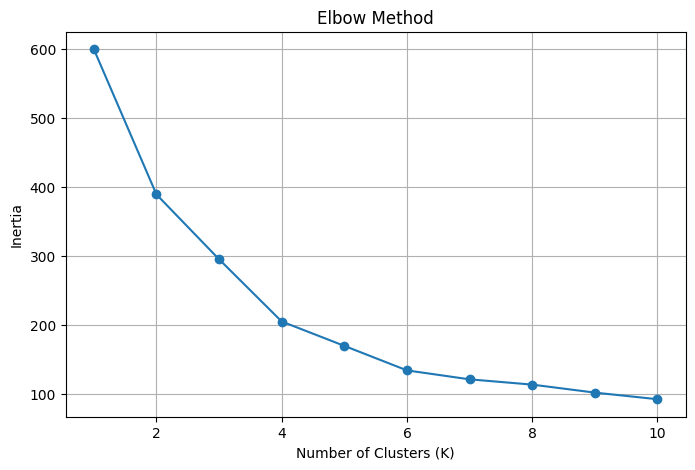

In [10]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [11]:
# Step 4: Apply KMeans with Optimal K (e.g., 5 based on elbow curve)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [12]:
# Add cluster labels to the original dataframe
df['Cluster'] = kmeans.labels_

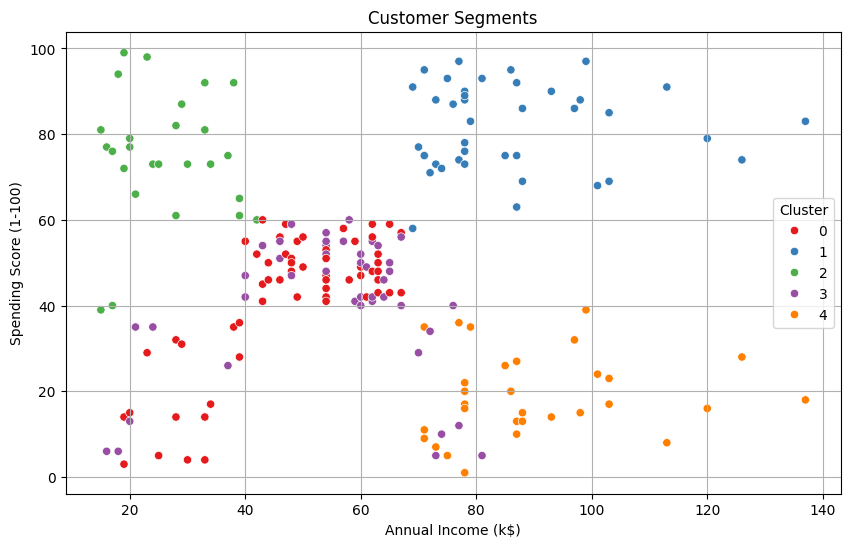

In [13]:
# Step 5: Visualize the Clusters (2D)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [14]:
# Step 6: Evaluate Clustering using Silhouette Score
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", round(score, 4))

Silhouette Score: 0.4085
